#### Random Forest Classifier

#### Step 1: Data Preprocessing

In [10]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv("Datasets/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
data.shape

(400, 5)

In [13]:
data = pd.get_dummies(data, columns=["Gender"])
data_new = data.drop(columns=["Gender_Male"])
data_new.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female
0,15624510,19,19000,0,0
1,15810944,35,20000,0,0
2,15668575,26,43000,0,1
3,15603246,27,57000,0,1
4,15804002,19,76000,0,0


In [16]:
X = data_new.iloc[:,[1,2,4]].values
Y = data_new.iloc[:,[3]].values

#### Step 2: Splitting the dataset

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42,test_size=0.25)

#### Step 3: Feature scaling

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Step 4: Model training

In [27]:
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', n_jobs=-1)
classifier.fit(X_train, Y_train)

C:\Users\PC\AppData\Local\Temp/ipykernel_7004/1375781503.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, Y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=-1)

#### Step 5: Checking accuracy

In [29]:
classifier.score(X_test, Y_test)

0.9

#### Predicting the result and plotting confusion matrix

In [31]:
Y_pred = classifier.predict(X_test)

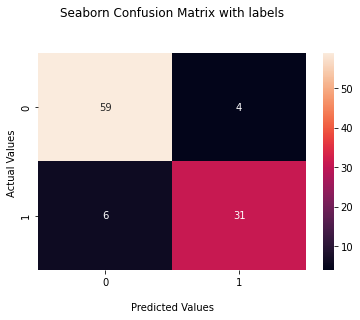

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
fig = sns.heatmap(cm, annot=True)
fig.set_title('Seaborn Confusion Matrix with labels\n\n')
fig.set_xlabel('\nPredicted Values')
fig.set_ylabel('Actual Values ')
plt.show()